In [5]:
import sys
sys.path.append('../script/')
sys.path.append('../class/')

import pandas as pd
import numpy as np
import sunnytools as st

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (20.0, 5.0)

# prepare some data
df = pd.read_csv('../data/fs/20170708_thai_fs.csv',parse_dates=[0],index_col=[0])
df.index=pd.DatetimeIndex(df.index)
df.index=df.index.date

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ticker= 'BEAUTY'
dfs=df[df.ticker==ticker].sort_index()
#dfs=dfs[dfs.index >= dt.date(2002,1,1)]

## PLOT REVENUE/PROFIT

In [7]:
cols=['revenue','gross_profit','operating_profit','net_profit','eps',"number_of_shares",'cash_flow_operation','cash_flow_investment','cash_flow_financing']
dfs[cols].rolling(window=1).sum().sort(ascending=False)

/Users/Sunny/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,revenue,gross_profit,operating_profit,net_profit,eps,number_of_shares,cash_flow_operation,cash_flow_investment,cash_flow_financing
2017-03-31,687.53,455.02,244.95,199.65,0.070000,2852.142857,272.70,183.33,4.830000e+00
2016-12-31,701.81,469.47,217.45,177.81,0.059630,2981.863636,156.99,-263.76,-8.000000e-02
2016-09-30,738.90,495.07,258.98,210.25,0.070347,2988.750000,236.89,62.33,-2.399000e+02
2016-06-30,588.22,392.44,169.18,138.73,0.046597,2977.222222,207.47,18.01,-2.489900e+02
2016-03-31,529.91,349.36,156.18,129.22,0.040000,3230.500000,101.78,67.12,0.000000e+00
2015-12-31,574.01,376.71,160.49,130.97,0.042302,3096.076923,206.73,-371.54,0.000000e+00
2015-09-30,447.63,294.89,123.40,101.90,0.033777,3016.888889,194.89,-15.67,-1.500000e+02
2015-06-30,405.92,271.82,111.61,93.62,0.033116,2827.000000,106.07,213.91,-1.920000e+02
2015-03-31,364.47,243.18,88.31,76.00,0.250000,304.000000,50.63,-98.57,0.000000e+00
2014-12-31,426.68,279.71,124.54,104.74,0.347789,301.160000,64.04,-43.13,0.000000e+00


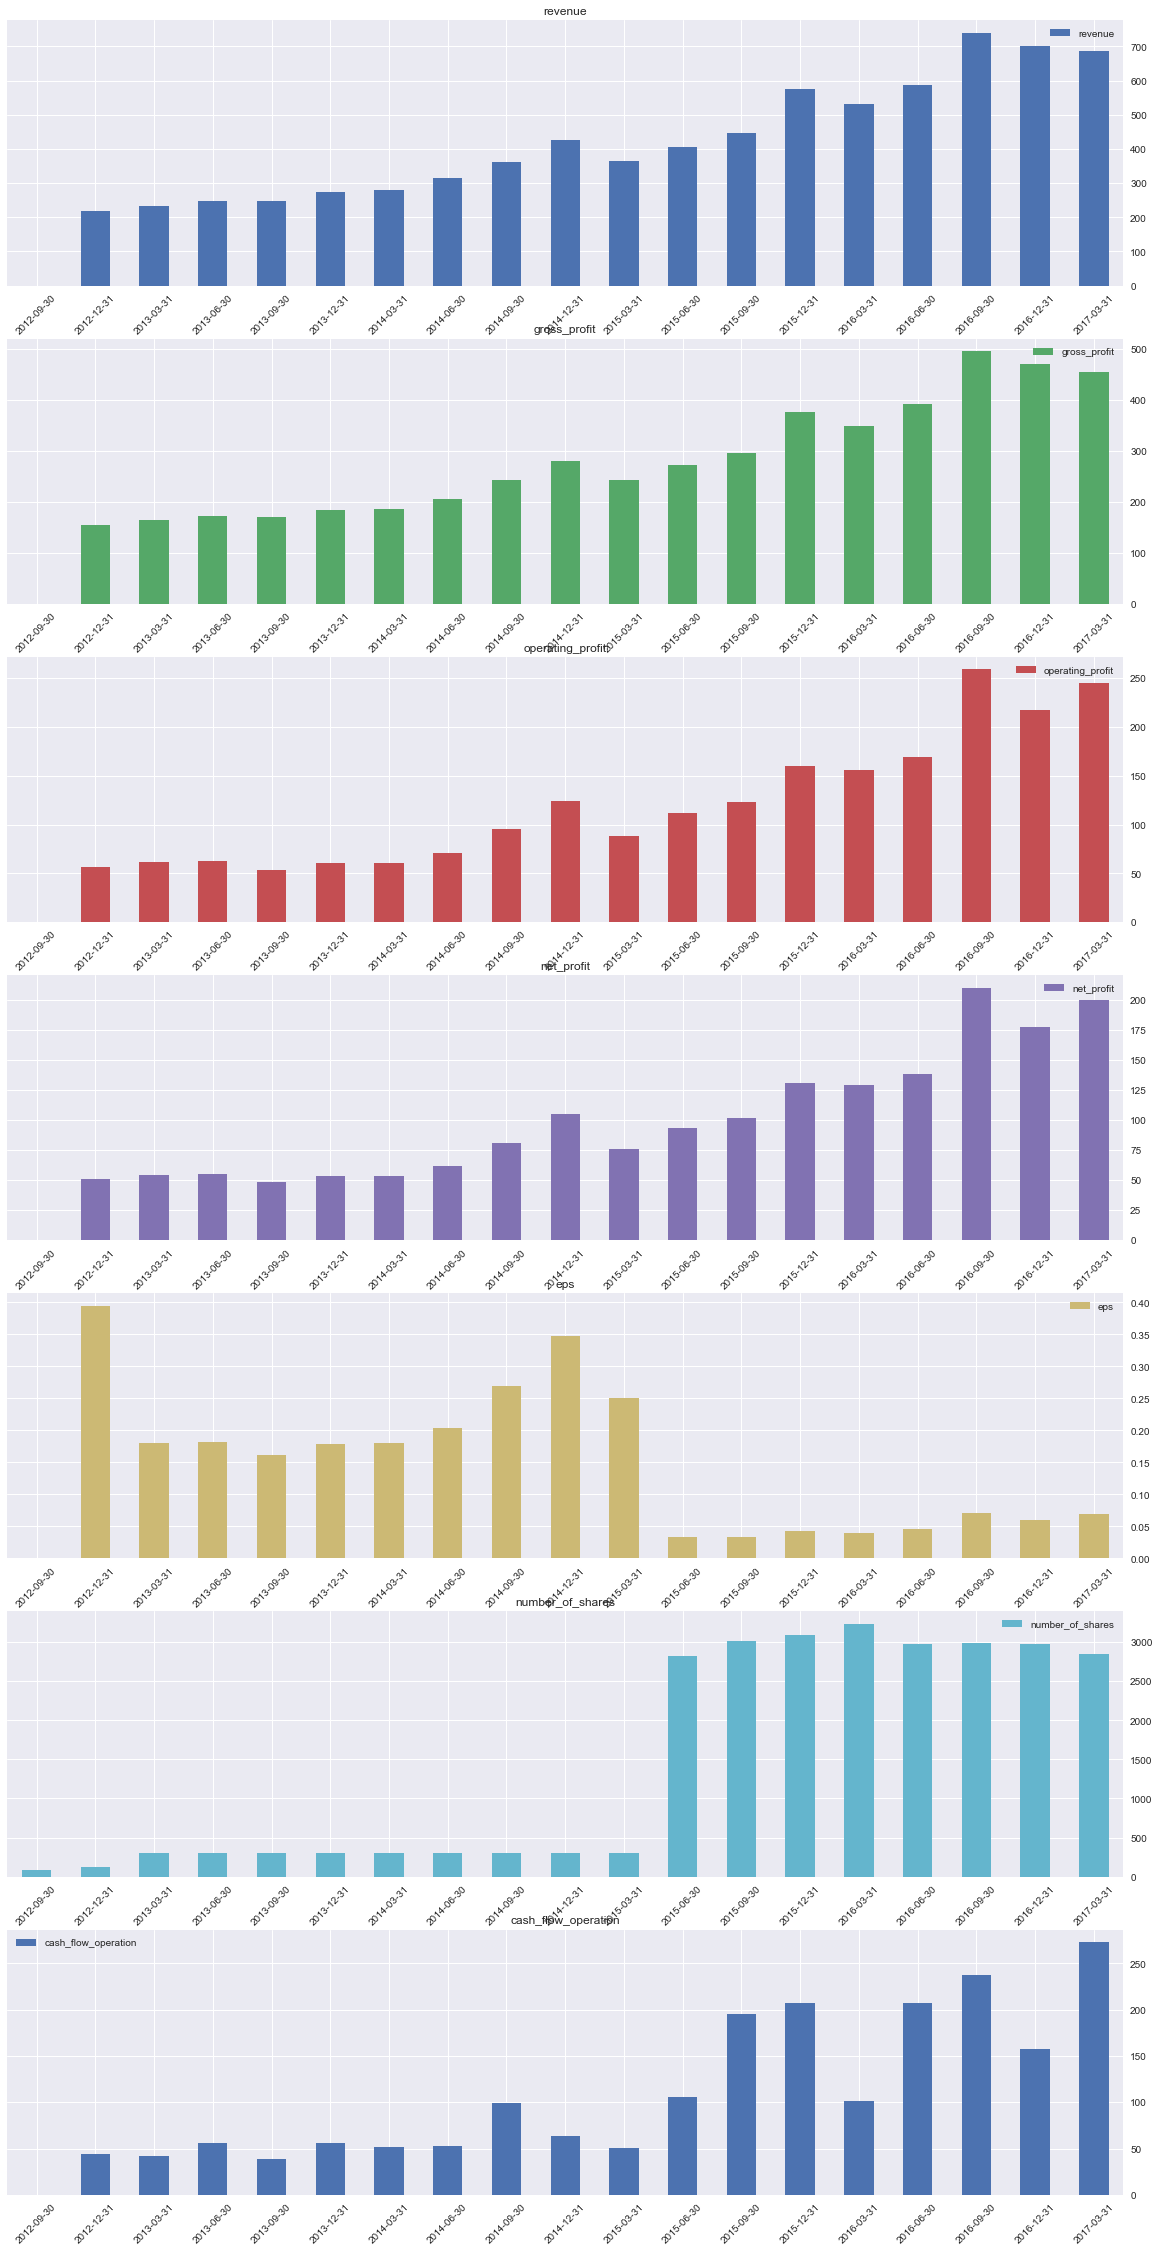

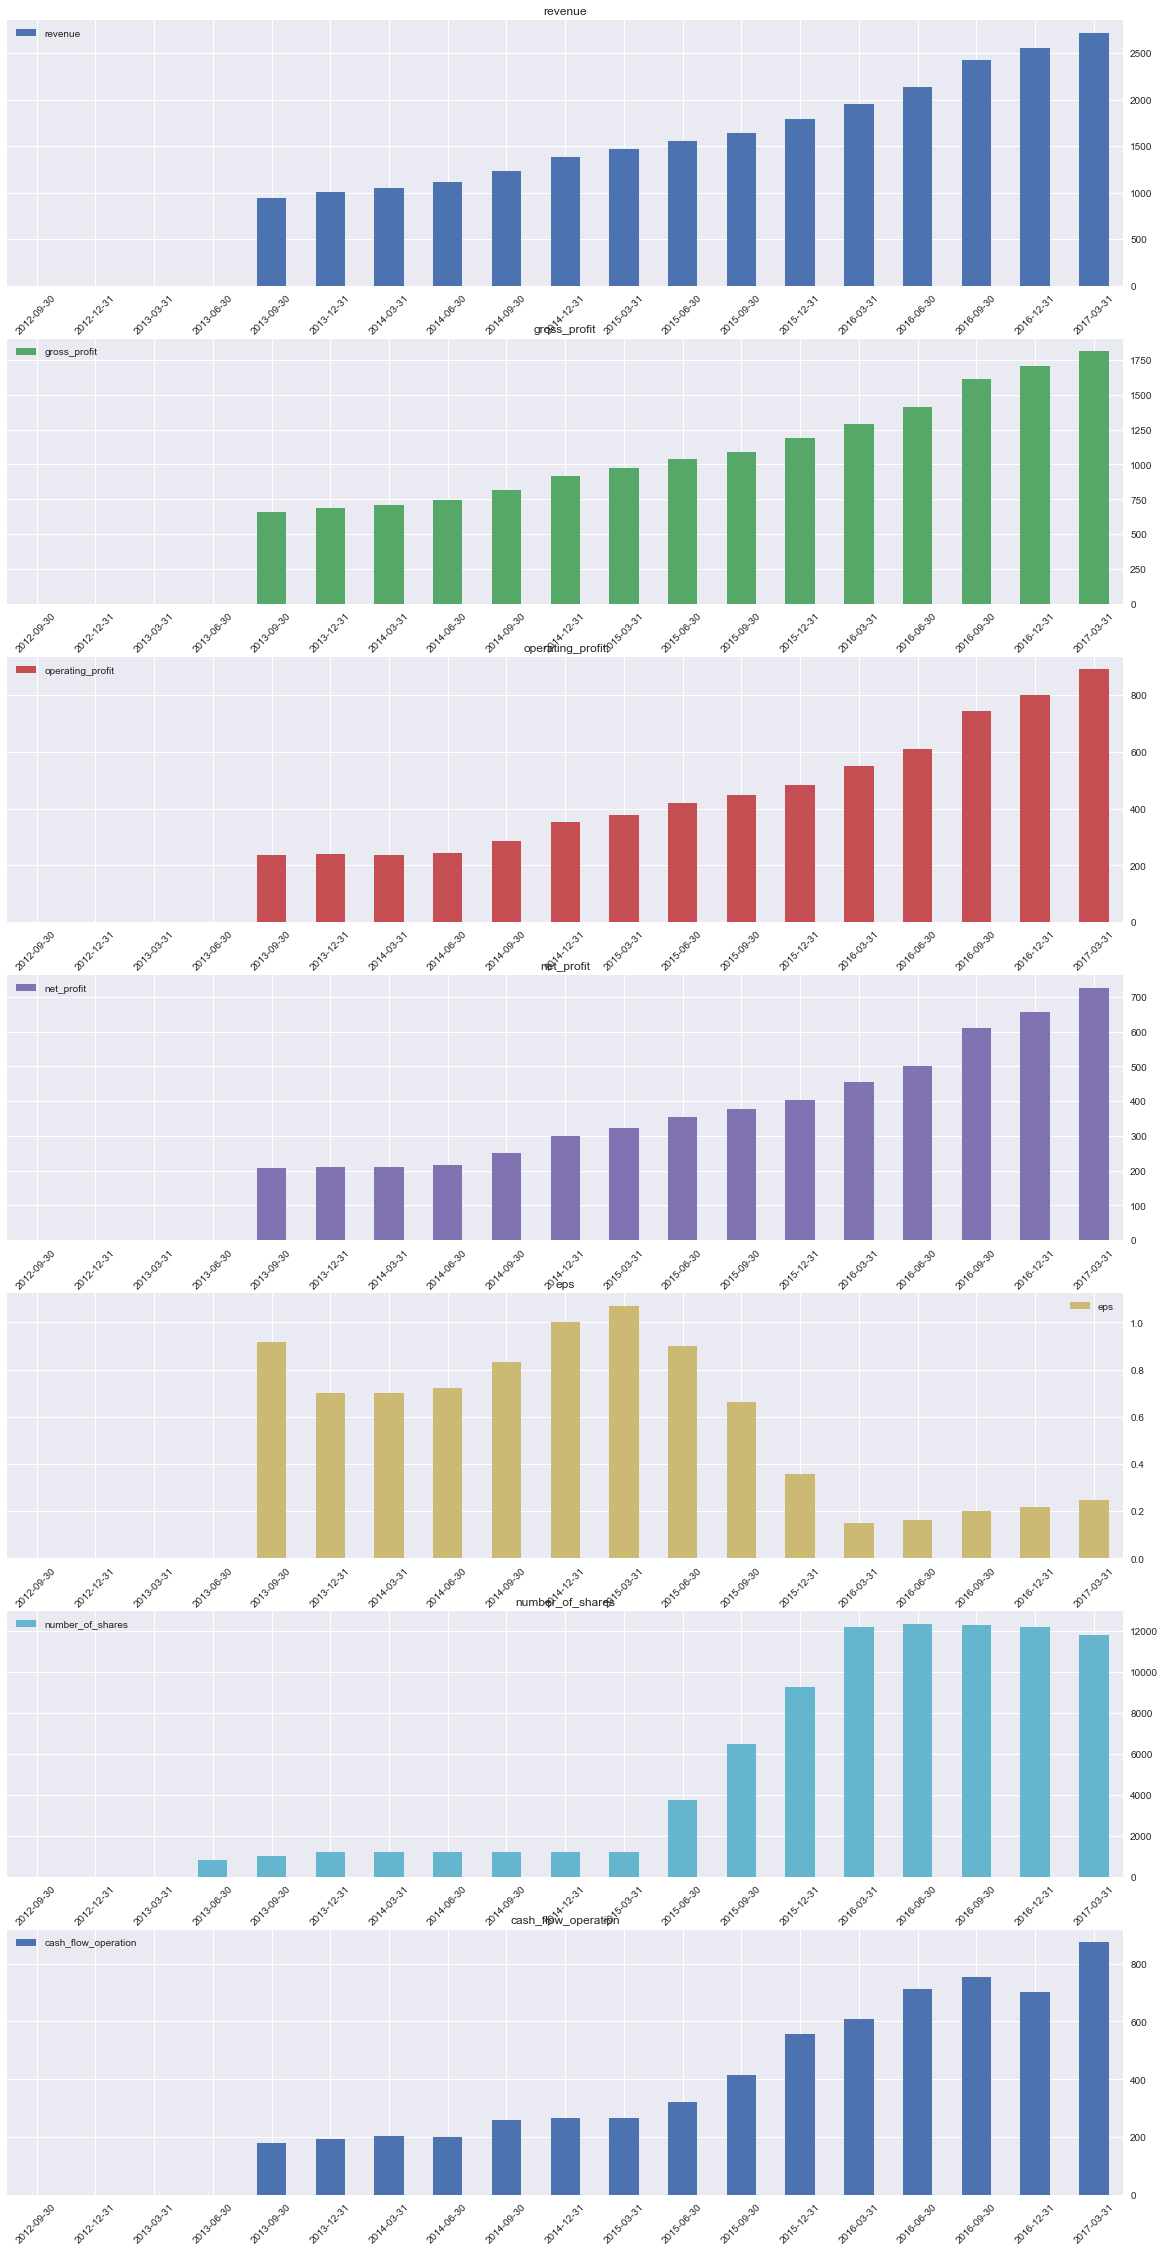

In [8]:
#plot reveue, gross profit, net profit, eps
cols=['revenue','gross_profit','operating_profit','net_profit','eps',"number_of_shares",'cash_flow_operation']
k=1
layout=(int(np.ceil(len(cols)/k)),k)
figsize=(20,40)

ax1=dfs[cols].plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)
ax2=dfs[cols].rolling(window=4).sum().plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)

set_yaxis_right = np.vectorize(lambda x: x.yaxis.tick_right())
rotate_xaxis = np.vectorize(lambda x: plt.setp(x.get_xticklabels(), rotation=45))


set_yaxis_right(ax1)
set_yaxis_right(ax2)
rotate_xaxis(ax1)
rotate_xaxis(ax2)

print('')

## Revenue, profit, cf

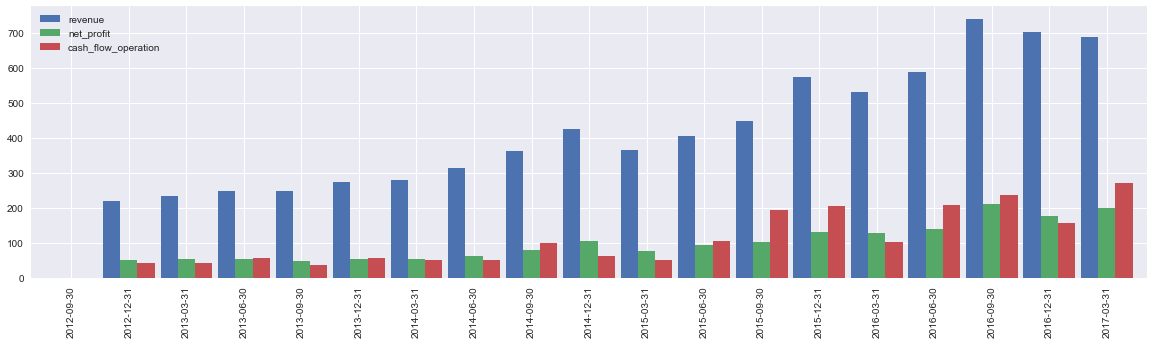

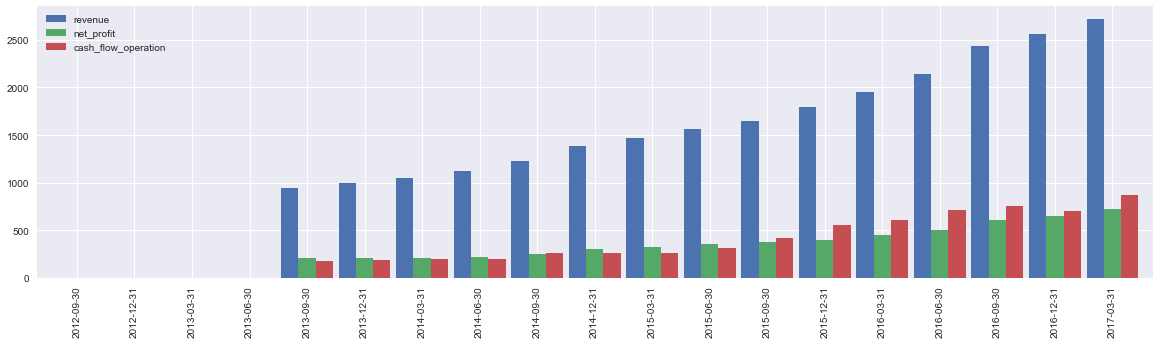

In [9]:
cols=['revenue','net_profit','cash_flow_operation']
dfs[cols].plot(kind='bar',width=0.9)
dfs[cols].rolling(window=4).sum().plot(kind='bar',width=0.9)


## GROWTH

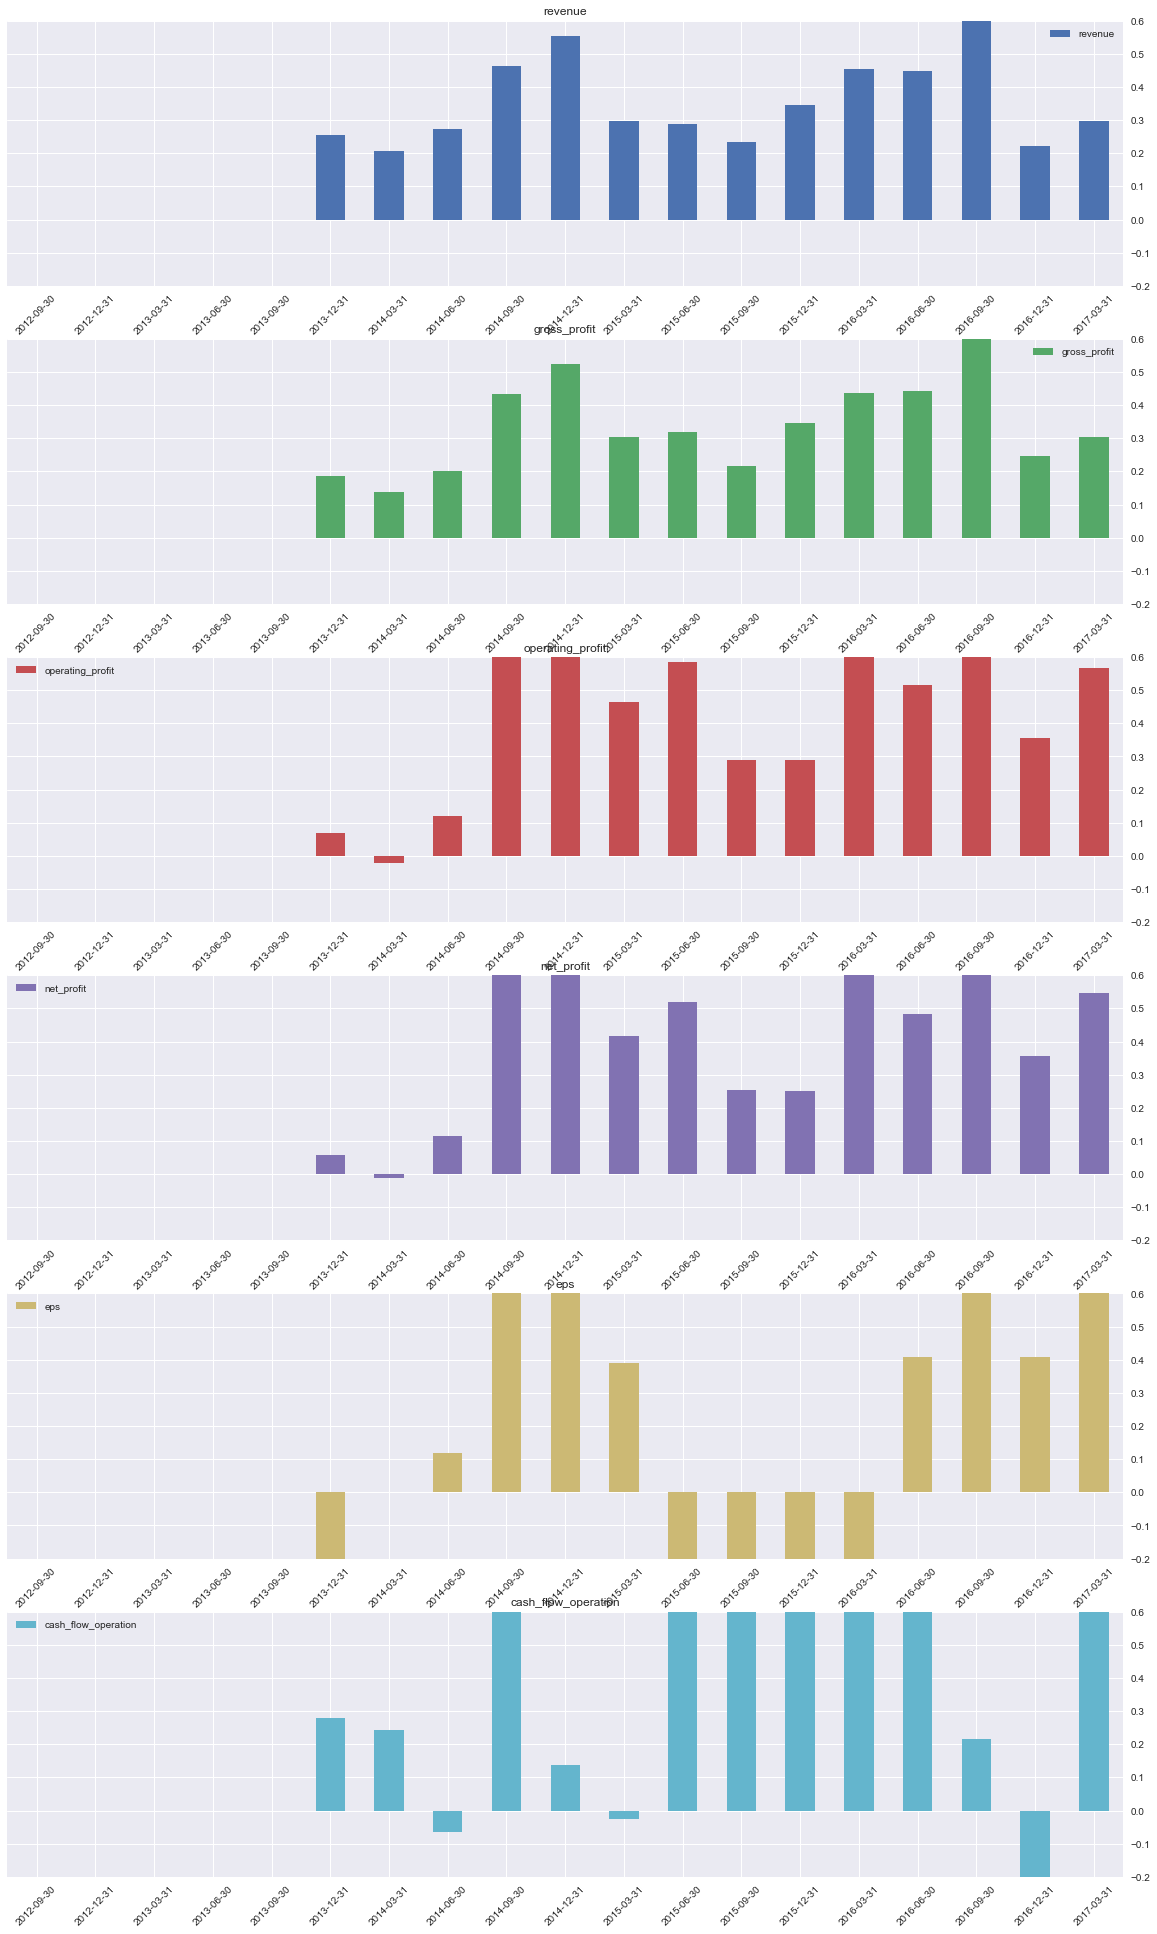

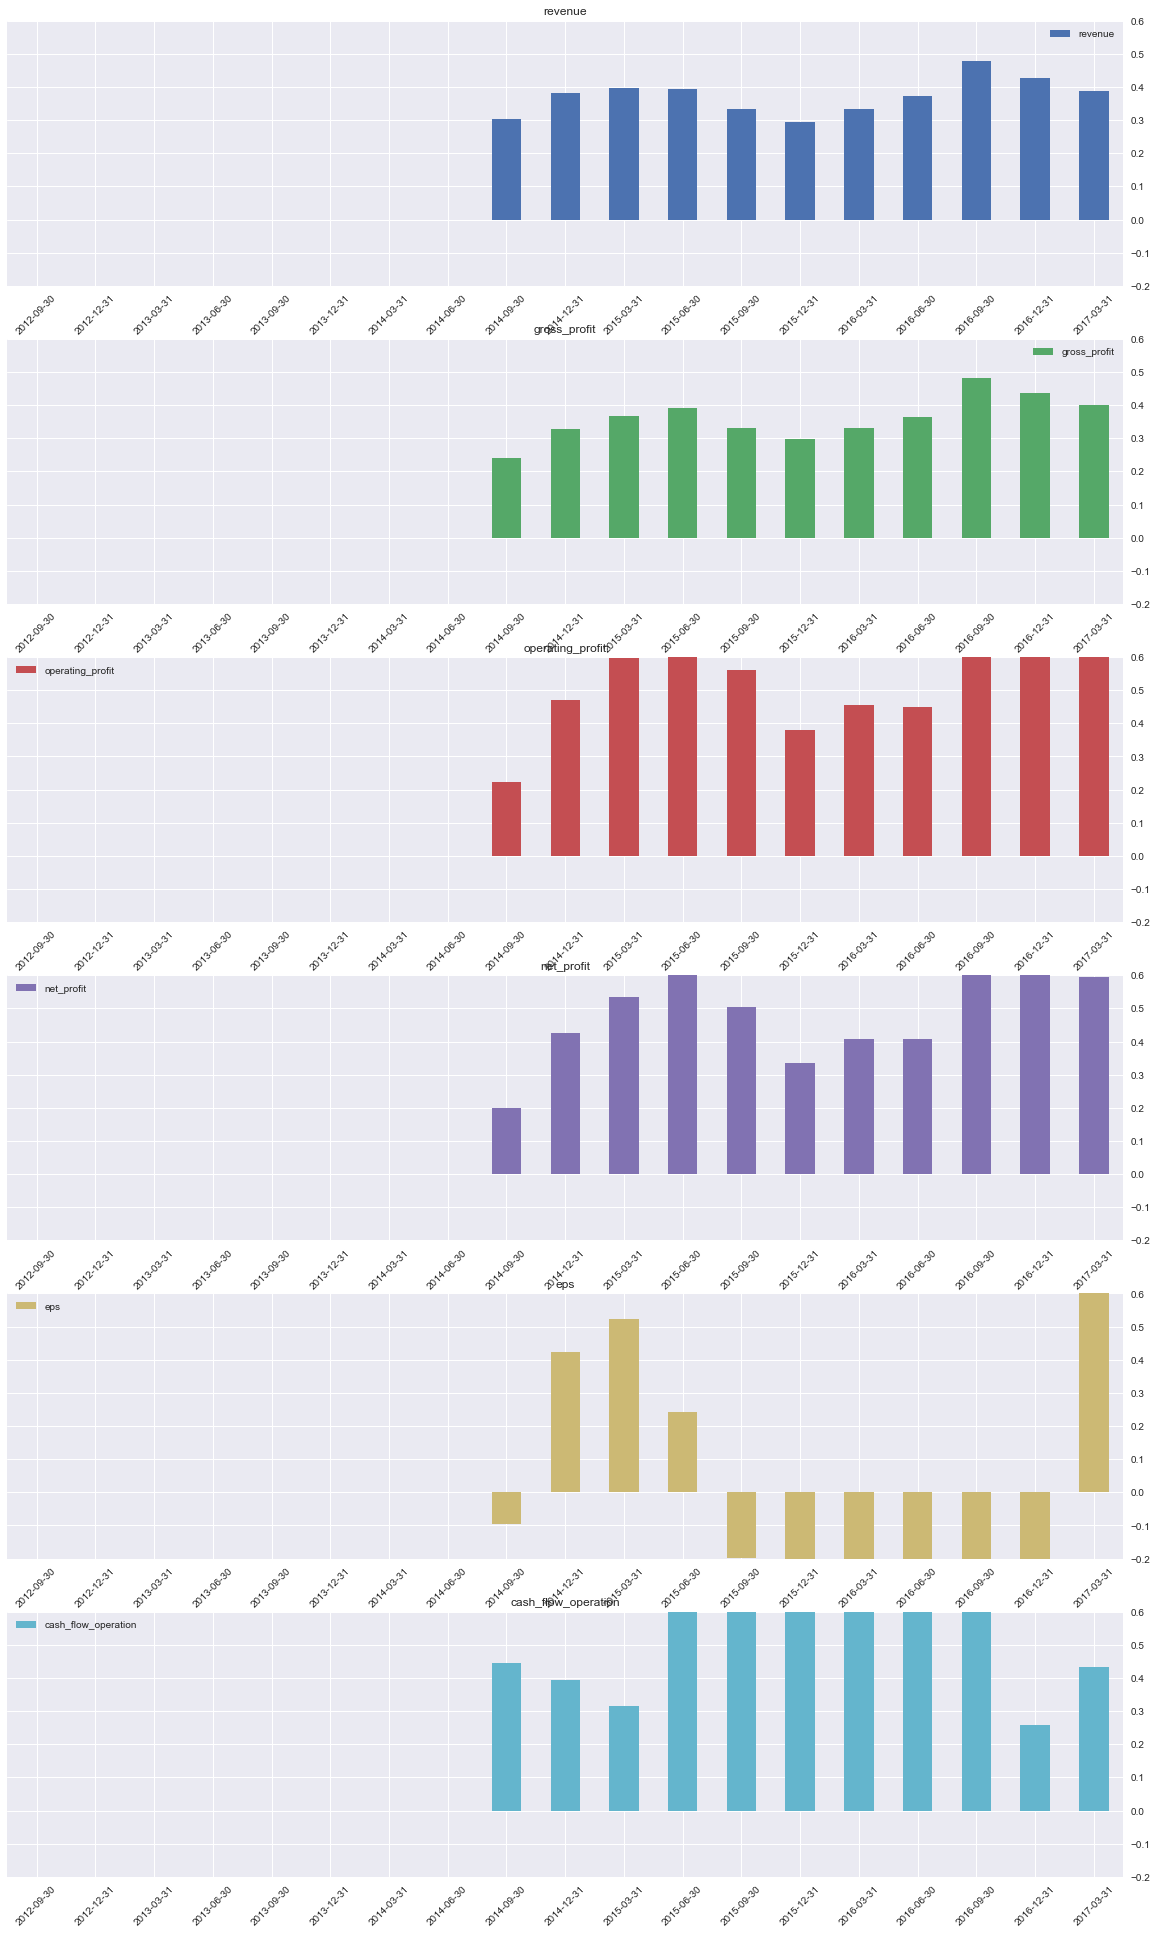

In [10]:
#plot reveue, gross profit, net profit, eps
cols=['revenue','gross_profit','operating_profit','net_profit','eps','cash_flow_operation']
clip=0.7

#QoQ growth
growth=dfs[cols].pct_change(periods=4)
growth_ttm=dfs[cols].rolling(window=4).sum().pct_change(periods=4)
ax1=dfs[cols].pct_change(periods=4).apply(lambda x: np.clip(x,-clip,clip)).plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)
#YoY growth
ax2=dfs[cols].rolling(window=4).sum().pct_change(periods=4).apply(lambda x: np.clip(x,-clip,clip)).plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)

set_ylim = np.vectorize(lambda x: x.set_ylim(-0.2,0.6))

set_yaxis_right(ax1)
set_yaxis_right(ax2)
set_ylim(ax1)
set_ylim(ax2)
rotate_xaxis(ax1)
rotate_xaxis(ax2)

print("")

## PLOT MARGIN

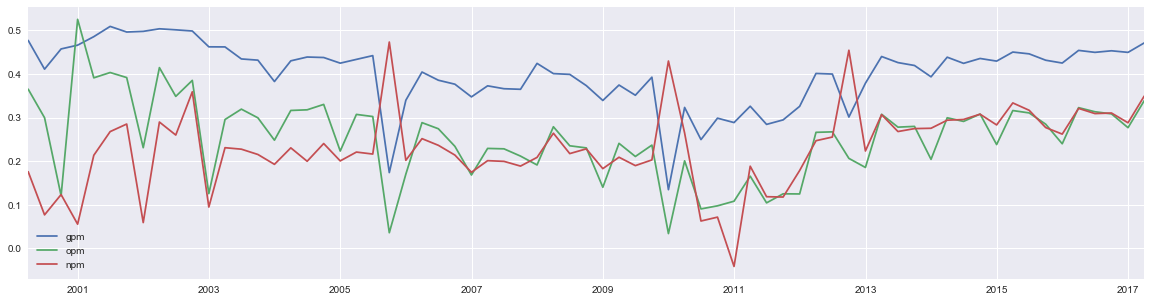

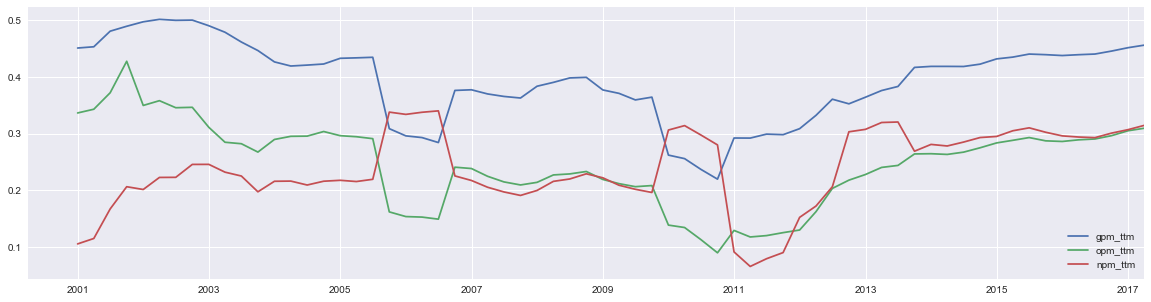

In [8]:
#margin
dfs['gpm']=dfs['gross_profit']/dfs['revenue']
dfs['opm']=dfs['operating_profit']/dfs['revenue']
dfs['npm']=dfs['net_profit']/dfs['revenue']
dfs['gpm_ttm']=dfs['gross_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()
dfs['opm_ttm']=dfs['operating_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()
dfs['npm_ttm']=dfs['net_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()

dfs[['gpm','opm','npm']].apply(lambda x: np.clip(x,-1,1)).plot()
dfs[['gpm_ttm','opm_ttm','npm_ttm']].apply(lambda x: np.clip(x,-1,1)).plot()

## PLOT CASHFLOW and  DIVIDEND

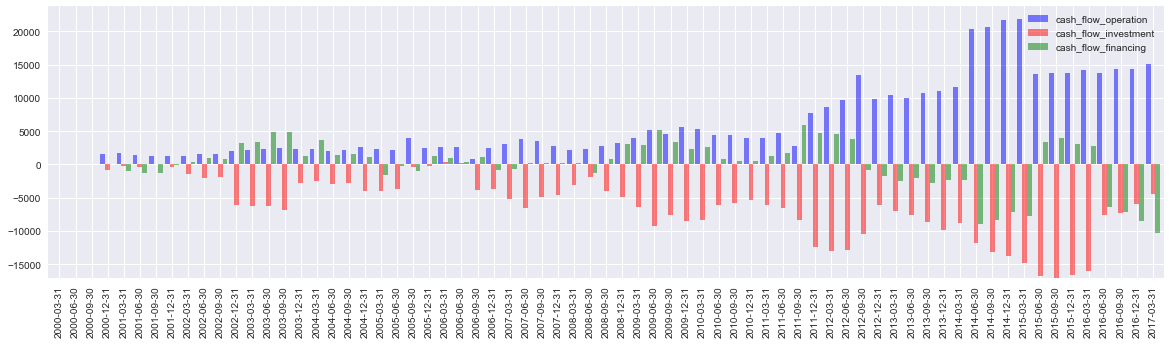

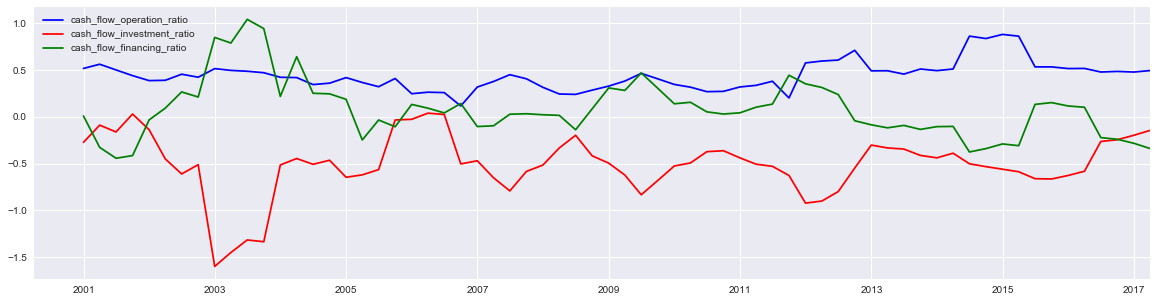

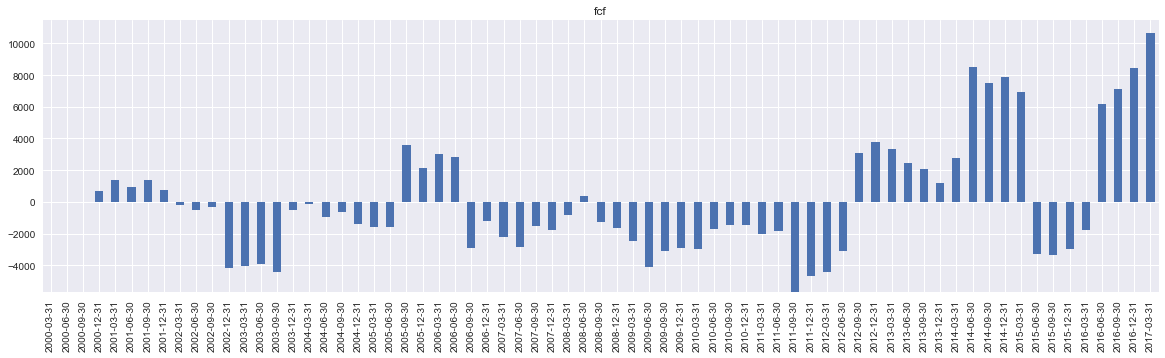

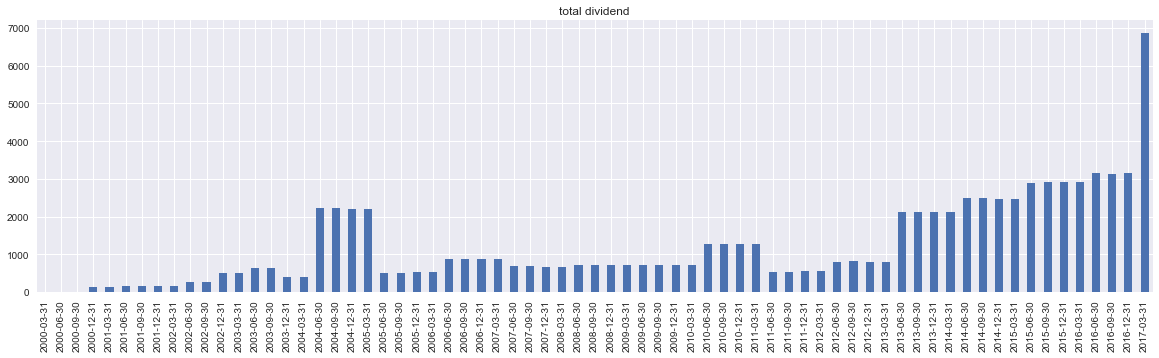

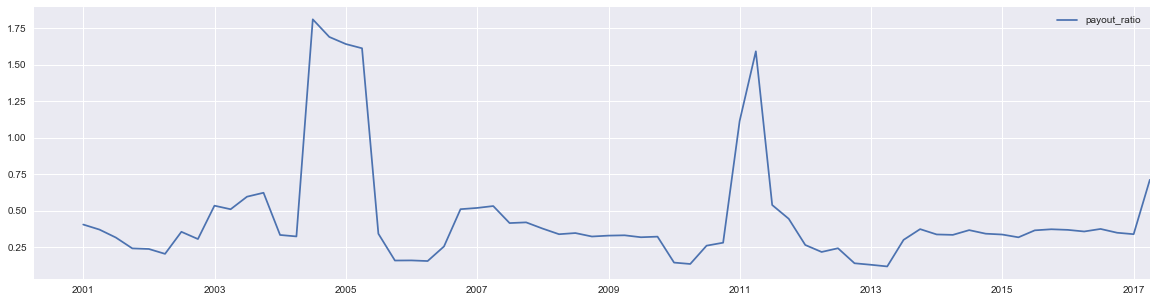

In [15]:
#cash flow all three
cols=['cash_flow_operation','cash_flow_investment','cash_flow_financing']
colors=['b','r','g']
wd=4

#ax=dfs[cols].rolling(window=4).sum().plot(kind='barh',figsize=(20,int(len(dfs)/2.0)))
#ax.xaxis.tick_top()

dfs[cols].rolling(window=wd).sum().plot(kind='bar',alpha=0.5,color=colors,label=cols,width=0.9)
# for i in range(len(cols)):
#     dfs[cols[i]].rolling(window=wd).sum().plot(kind='bar',alpha=0.5,color=colors[i],label=cols[i])
plt.legend()


#plot investment ratio
plt.figure()
for i in range(len(cols)):
    col=cols[i]
    dfs[col+'_ratio']=dfs[col].rolling(window=wd).sum()/dfs['revenue'].rolling(window=wd).sum()
dfs[[c+'_ratio' for c in cols]].plot(color=colors)

#plot dividend per cashflow generate
plt.figure()
plt.title('fcf')
dfs['free_cash_flow']=(dfs['cash_flow_operation']+dfs['cash_flow_investment'])
dfs['free_cash_flow'].rolling(window=wd).sum().plot(kind='bar')

#plot dividend per cashflow generate
plt.figure()
plt.title('total dividend')
dfs['dividend'].rolling(window=wd).sum().plot(kind='bar')

plt.figure()
dfs['div_per_cf']=dfs['dividend'].rolling(window=wd).sum()/dfs['cash_flow_operation'].rolling(window=wd).sum()
dfs['payout_ratio']=dfs['dividend'].rolling(window=wd).sum()/dfs['net_profit'].rolling(window=wd).sum()
dfs[['payout_ratio']].plot()

## PLOT ROE,ROA,ROIC

## LIQUIDITY RATIO

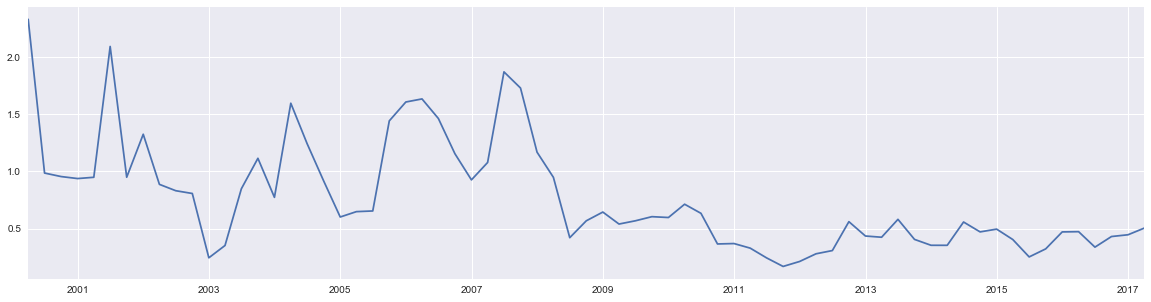

In [10]:
#liquidty

#current ratio
dfs['current_ratio']=dfs['current_asset']/dfs['current_liability']
dfs['current_ratio'].plot()

## INVENTORY AND RECEIVABLE PER SALE

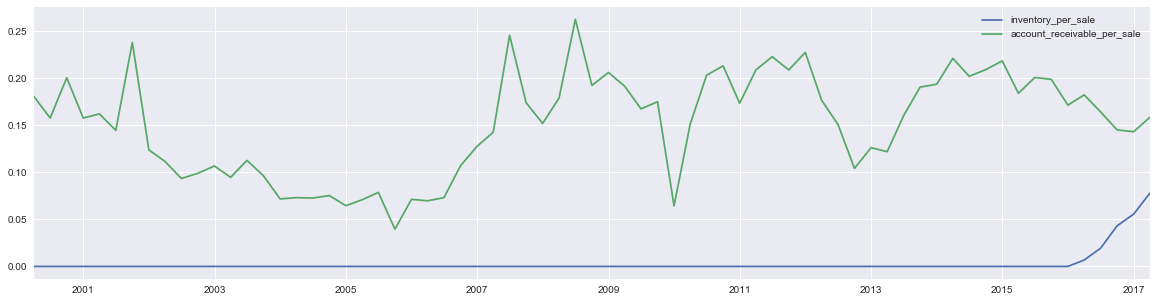

In [11]:
dfs['inventory_per_sale']=dfs['inventory']/dfs['revenue']
dfs['account_receivable_per_sale']=dfs['account_receivable']/dfs['revenue']

dfs[['inventory_per_sale','account_receivable_per_sale']].plot()

## DEBT AND REPAY ABILITY

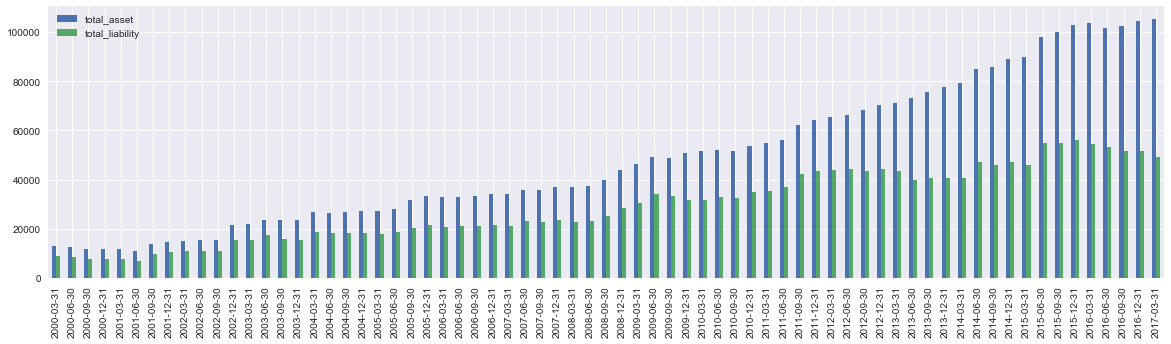

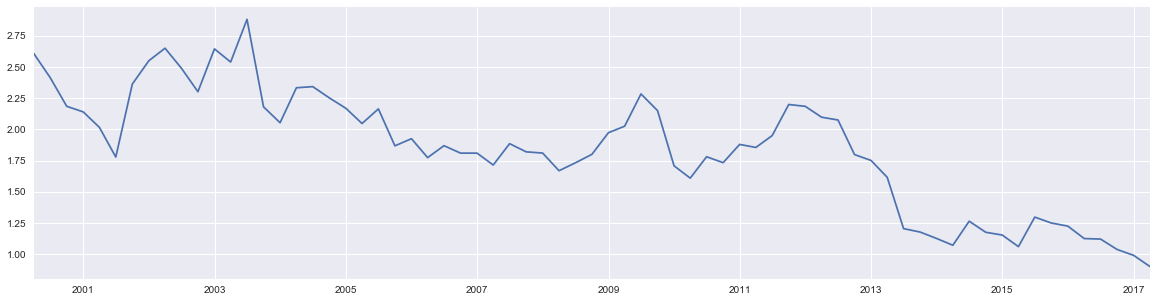

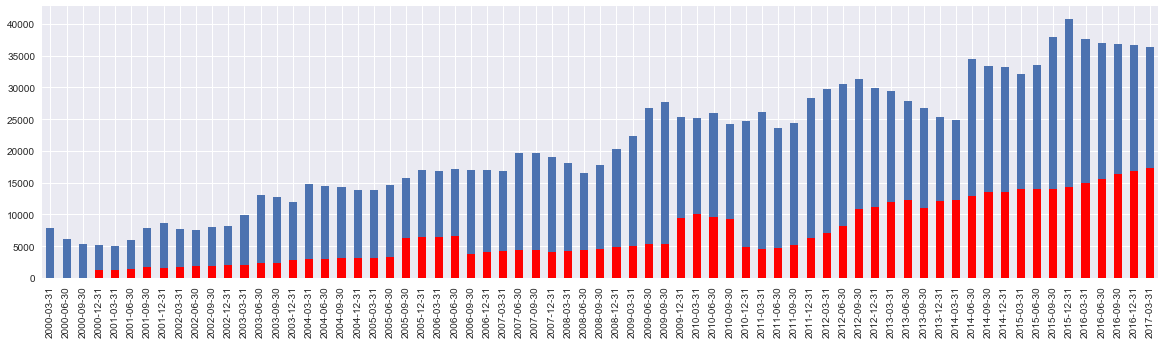

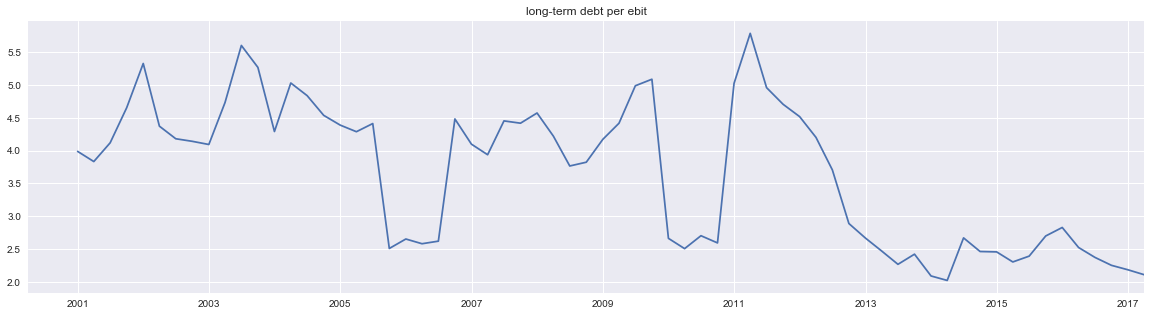

In [12]:
#debt, health
dfs[['total_asset','total_liability']].plot(kind='bar')
plt.figure()
dfs['de_ratio']=dfs['total_liability']/dfs['total_equity']
dfs['de_ratio'].plot()
plt.figure()
dfs['non_current_liability'].plot(kind='bar')
dfs['ebitda'].rolling(window=4).sum().plot(kind='bar',color='red')
plt.figure()
plt.title('long-term debt per ebit')
dfs['lt_per_ebit']=(dfs['non_current_liability']/dfs['ebitda'].rolling(window=4).sum())
dfs['lt_per_ebit'].apply(lambda x: np.clip(x,-20,20)).plot()

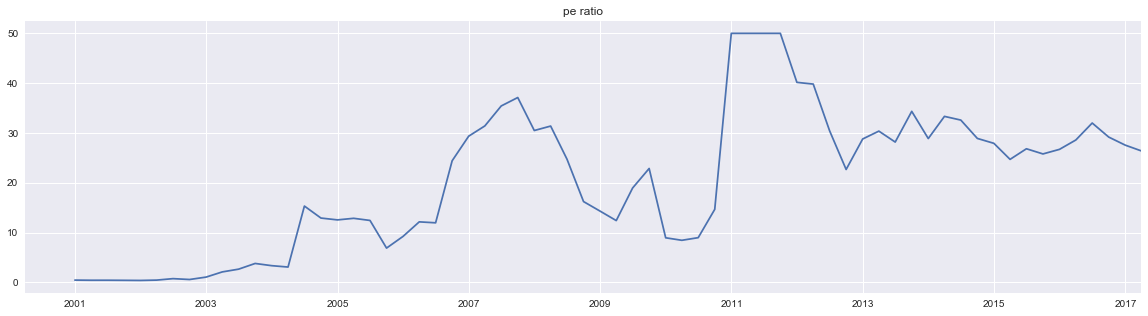

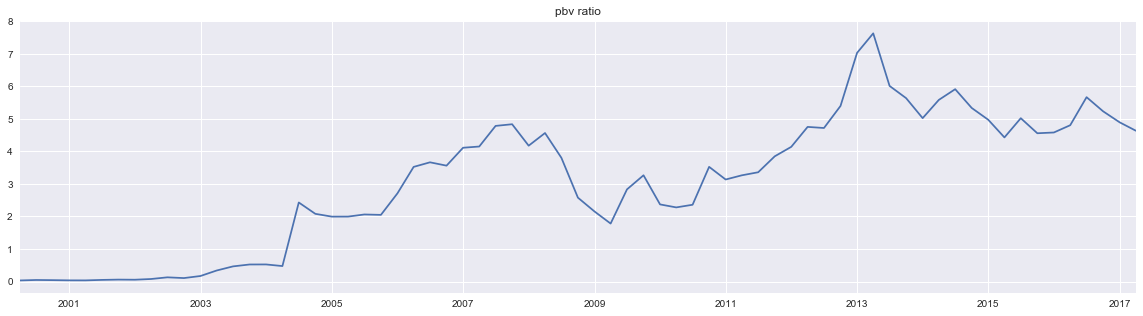

In [13]:
dfs['pe_ratio']=(dfs['close_price']*dfs['number_of_shares'])/dfs['net_profit'].rolling(window=4).sum()
dfs['pbv_ratio']=dfs['close_price']/dfs['total_equity']*dfs['number_of_shares']

plt.figure()
plt.title('pe ratio')
dfs['pe_ratio'].apply(lambda x: np.clip(x,-50,50)).plot()

plt.figure()
plt.title('pbv ratio')
dfs['pbv_ratio'].plot()